In [10]:
import pandas as pd

In [11]:
import os
os.getcwd()


'/Users/student/Documents/Repos/Bierprojekt/src/eda'

In [ ]:

# Read the CSV file
df_fragebogen = pd.read_csv('../../data/fragebogen.csv')

# Print the DataFrame in the terminal
print(df_fragebogen)


   variable                                           question  \
0        Q0  Trinken Sie alkoholhaltiges oder alkoholfreies...   
1        Q1  Wie häufig trinken Sie grundsätzlich alkoholfr...   
2       Q2A               in Gesellschaft bei Freunden/Familie   
3       Q2B                    auf privaten Partys oder Feiern   
4       Q2C                                 zuhause beim Essen   
..      ...                                                ...   
80     Q17A                                       alleinlebend   
81     Q17B                            mit Kind/Kindern lebend   
82     Q17C                       mit Eltern/Elternteil lebend   
83     Q17D         mit Freund/in bzw. Lebenspartner/in lebend   
84     Q17E  mit sonstigen Personen lebend (bspw. studentis...   

                                              options  
0                                ['Ja(1)', 'Nein(2)']  
1   ['täglich(1)', 'mehrmals pro Woche(2)', 'mehrm...  
2   ['nie(1)', 'gelegentlich(2)', 'häuf

In [ ]:
# Path to the data: /Bierprojekt/src/llm/clean_data.csv

df_antworten = pd.read_csv('../../src/llm/clean_data.csv')
print(df_antworten)

     Q1  Q2A  Q2B  Q2C  Q2D  Q2E  Q2F  Q2G  Q4A  Q4B  ...  Q12I  Q13   Q14  \
0     5    2  2.0  1.0  1.0  1.0  2.0  1.0  2.0  2.0  ...   3.0  2.0   6.0   
1     3    2  2.0  1.0  1.0  2.0  2.0  1.0  2.0  2.0  ...   2.0  1.0   6.0   
2     3    3  3.0  2.0  2.0  1.0  2.0  2.0  3.0  2.0  ...   4.0  2.0   8.0   
3     3    2  2.0  1.0  2.0  2.0  2.0  1.0  2.0  2.0  ...   2.0  1.0   5.0   
4     2    2  3.0  1.0  2.0  3.0  3.0  3.0  3.0  3.0  ...   5.0  1.0   5.0   
..   ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...   ...   
483   3    3  3.0  1.0  1.0  3.0  3.0  3.0  2.0  3.0  ...   3.0  1.0   8.0   
484   2    3  3.0  2.0  1.0  3.0  3.0  2.0  3.0  2.0  ...   5.0  2.0   7.0   
485   3    2  3.0  1.0  1.0  3.0  3.0  3.0  1.0  3.0  ...   1.0  2.0  12.0   
486   5    1  3.0  1.0  1.0  3.0  1.0  1.0  2.0  2.0  ...   2.0  2.0   6.0   
487   5    2  1.0  2.0  1.0  3.0  1.0  2.0  1.0  3.0  ...   2.0  2.0   9.0   

     Q15  Q16  Q17A  Q17B  Q17C  Q17D  Q17E  
0    1.0  3.0   0

In [ ]:
# Print enjoyment questions

# Define the lists of positive and negative question IDs
positive_questions = ['Q2C', 'Q2D', 'Q2G', 'Q8A', 'Q8B', 'Q6C']
negative_questions = ['Q8C', 'Q6F']

# Combine the lists of question IDs
selected_question_ids = positive_questions + negative_questions

# Filter the DataFrame df_fragebogen
df_selected_questions = df_fragebogen[df_fragebogen['variable'].isin(selected_question_ids)].copy()

# Add a 'Sentiment' column
df_selected_questions['Sentiment'] = df_selected_questions['variable'].apply(lambda x: 'Positive' if x in positive_questions else 'Negative')

# Print the new DataFrame
print("Selected questions with Sentiment:")
print(df_selected_questions)

Ausgewählte Fragen mit Sentiment:
   variable                                           question  \
4       Q2C                                 zuhause beim Essen   
5       Q2D                            zuhause zur Entspannung   
8       Q2G                 im Urlaub im Hotel, am Strand etc.   
21      Q6C  Es macht mir großen Spaß ein Bier oder bierhal...   
24      Q6F  Auf den Konsum von Bier oder bierhaltigen Getr...   
31      Q8A                             Geschmack des Getränks   
32      Q8B                          Geruch/Aroma des Getränks   
33      Q8C                             Kaufpreis des Getränks   

                                              options Sentiment  
4   ['nie(1)', 'gelegentlich(2)', 'häufig(3)', 'ke...   Positiv  
5   ['nie(1)', 'gelegentlich(2)', 'häufig(3)', 'ke...   Positiv  
8   ['nie(1)', 'gelegentlich(2)', 'häufig(3)', 'ke...   Positiv  
21  ['trifft überhaupt nicht zu(1)', 'trifft eher ...   Positiv  
24  ['trifft überhaupt nicht zu(1)', 'tri


Korrelationsmatrix der Antworten:
          Q2C       Q2D       Q2G       Q8A       Q8B       Q6C       Q8C  \
Q2C  1.000000  0.608014  0.289931 -0.094051  0.014985  0.258708 -0.083217   
Q2D  0.608014  1.000000  0.288509 -0.129758 -0.093727  0.326527 -0.135998   
Q2G  0.289931  0.288509  1.000000 -0.016918  0.011012  0.433356 -0.044932   
Q8A -0.094051 -0.129758 -0.016918  1.000000  0.333739  0.015632  0.026280   
Q8B  0.014985 -0.093727  0.011012  0.333739  1.000000 -0.028498  0.085006   
Q6C  0.258708  0.326527  0.433356  0.015632 -0.028498  1.000000 -0.071972   
Q8C -0.083217 -0.135998 -0.044932  0.026280  0.085006 -0.071972  1.000000   
Q6F  0.366759  0.421862  0.320239 -0.112085  0.021480  0.437194 -0.121361   

          Q6F  
Q2C  0.366759  
Q2D  0.421862  
Q2G  0.320239  
Q8A -0.112085  
Q8B  0.021480  
Q6C  0.437194  
Q8C -0.121361  
Q6F  1.000000  


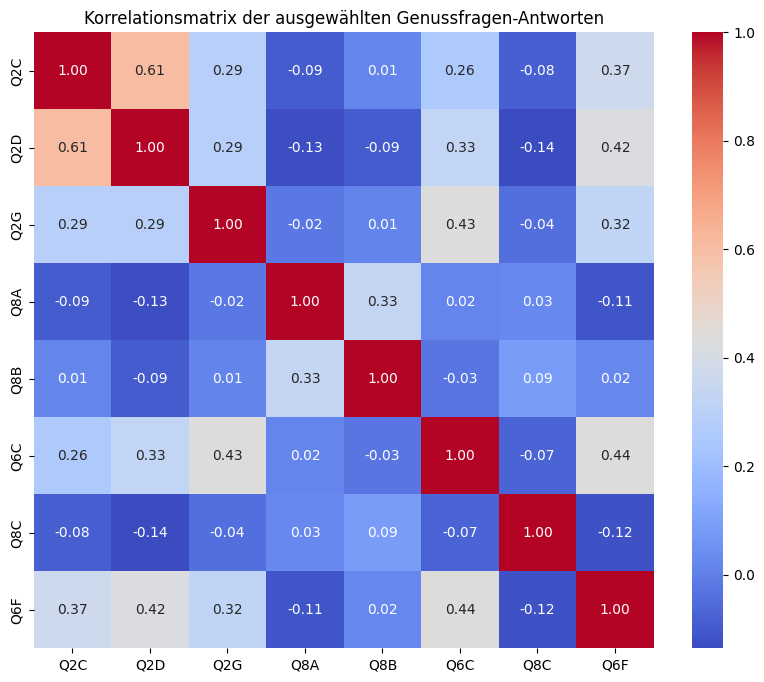

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns from df_antworten
df_antworten_selected = df_antworten[selected_question_ids].copy()

# The -99 values were already converted to NaN in clean_data.csv.

# Ensure all columns are numeric
for col in df_antworten_selected.columns:
    df_antworten_selected[col] = pd.to_numeric(df_antworten_selected[col], errors='coerce')

# Calculate the correlation matrix
correlation_matrix = df_antworten_selected.corr()

# Print the correlation matrix
print("\nCorrelation matrix of the answers:")
print(correlation_matrix)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Enjoyment Question Answers')
plt.show()